In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_all_mod = pd.read_csv("all_mod_data_tissue_annotation1.tsv", sep='\t')
data_P = pd.read_csv("phospho_data_tissue_annotation_enrichment1.txt", sep="\t")

In [3]:
data_all_mod.dropna(axis=0, subset=["tissue"], inplace=True)
data_P.dropna(axis=0, subset=["tissue"], inplace=True)
data_P = data_P[(data_P["modres"]=="S")|(data_P["modres"]=="T")|(data_P["modres"]=="Y")]
data_all_mod = data_all_mod[(data_all_mod["proj"]!="PXD001985")&(data_all_mod["proj"]!="PXD002014")&(data_all_mod["proj"]!="PXD002437")&
            (data_all_mod["proj"]!="PXD003533")&(data_all_mod["proj"]!="PXD004683")&(data_all_mod["proj"]!="PXD006095")&
            (data_all_mod["proj"]!="PXD006911")&(data_all_mod["proj"]!="PXD008568")&(data_all_mod["proj"]!="PXD009880")&
            (data_all_mod["proj"]!="PXD011241")&(data_all_mod["proj"]!="PXD011309")]
data_all_mod["tissue"] = data_all_mod["tissue"].replace(["Kiney"], "Kidney")

In [4]:
print(data_all_mod.shape[0])
print(data_P.shape[0])

4042382
377186


In [5]:
list_tissues_STY = ["Adipose tissue", "B-cells", "Blood", "Bone", "Brain", "Breast",
                "Cerebrospinal fluid", "Cervix", "Colon",
                "Dental plaque", "Esophagus", "Eye", "Follicular fluid", "Heart", "Hela", "Kidney",
                "Liver", "Lung", "Lymph node", "Menstrual fluid", "Monocytes", "Nasal polyps",
               "NK-cells", "Ovary", "Pancreas", "Palatine tonsils", "Parotid gland", "PBMC",
                "Peritoneal dialysis fluid", "Placenta", "Skeletal muscle", "Skin", "Small intestine",
               "Synovial tissue", "T-cells", "Testis", "Tooth", "Umbilical cord", "Ureter",
               "Urinary bladder", "Urine"]

In [6]:
data_all_mod_mods1 = data_all_mod.groupby(["modification"], as_index=False).agg({"unimod": "first"})
data_all_mod_mods = pd.concat([data_all_mod_mods1, pd.DataFrame({"modification": "[21]Phospho", "unimod": 21}, index=[0])],
                             axis=0, ignore_index=True)
#data_all_mod_mods = data_all_mod_mods1.append({"modification": "[21]Phospho", "unimod": 21}, ignore_index=True)
data_all_mod_mods.sort_values(by="unimod", axis=0, inplace=True)
print(data_all_mod_mods.shape[0])
list_mods = data_all_mod_mods["modification"].to_list()
data_all_mod_mods.tail()

134


,modification,unimod
52,[1989]monomethylphosphothione,1989
54,[2006]Haloxon,2006
55,[2007]Methamidophos-S,2007
56,[2008]Methamidophos-O,2008
58,[2014]Nitrene,2014


In [7]:
data_all_mod_protein = data_all_mod.groupby(["ACC_ID", "modification"], as_index=False).agg({"tissue":
                                                                                            lambda x:",".join(x)})
print(data_all_mod_protein.shape[0])
data_all_mod_protein

202845


,ACC_ID,modification,tissue
0,A0A024RBG1,[276]AEBS,"Testis,Testis,Testis,Testis"
1,A0A024RBG1,[401]Didehydro,Liver
2,A0A024RBG1,[4]Carbamidomethyl,Testis
3,A0A024RBG1,[58]Propionyl,"Testis,Testis"
4,A0A024RBG1,[926]ethylamino,Kidney
...,...,...,...
202840,Q9Y6Z7,[385]Ammonia-loss,Placenta
202841,Q9Y6Z7,[472]AEC-MAEC,Blood
202842,Q9YNA8,[926]ethylamino,Colon
202843,U3KPV4,[898]pyrophospho,Umbilical cord


In [8]:
for tissue in list_tissues_STY:
    data_all_mod_protein[tissue] = data_all_mod_protein["tissue"].str.contains(tissue)
data_all_mod_protein.replace({True:1, False:0}, inplace=True)
data_all_mod_protein

,ACC_ID,modification,tissue,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,Cerebrospinal fluid,...,Skin,Small intestine,Synovial tissue,T-cells,Testis,Tooth,Umbilical cord,Ureter,Urinary bladder,Urine
0,A0A024RBG1,[276]AEBS,"Testis,Testis,Testis,Testis",0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,A0A024RBG1,[401]Didehydro,Liver,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A0A024RBG1,[4]Carbamidomethyl,Testis,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,A0A024RBG1,[58]Propionyl,"Testis,Testis",0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,A0A024RBG1,[926]ethylamino,Kidney,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202840,Q9Y6Z7,[385]Ammonia-loss,Placenta,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202841,Q9Y6Z7,[472]AEC-MAEC,Blood,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202842,Q9YNA8,[926]ethylamino,Colon,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202843,U3KPV4,[898]pyrophospho,Umbilical cord,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [9]:
data_P["modification"] = "[21]Phospho"
data_P_protein = data_P.groupby(["ACC_ID", "modification"], as_index=False).agg({"tissue":
                                                                                            lambda x:",".join(x)})
print(data_P_protein.shape[0])
data_P_protein

5855


,ACC_ID,modification,tissue
0,A0A075B6H7,[21]Phospho,Lung
1,A0A075B6S5,[21]Phospho,Menstrual fluid
2,A0A087WXM9,[21]Phospho,Testis
3,A0A0B4J2D5,[21]Phospho,"PBMC,PBMC"
4,A0A0B4J2D9,[21]Phospho,"Blood,Blood,Blood"
...,...,...,...
5850,Q9Y6X4,[21]Phospho,"Blood,Blood,Blood,Blood, Cerebrospinal fluid, ..."
5851,Q9Y6X8,[21]Phospho,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo..."
5852,Q9Y6X9,[21]Phospho,"Umbilical cord,Umbilical cord,Blood,Blood,Bloo..."
5853,Q9Y6Y0,[21]Phospho,"Urinary bladder, Colon, Kidney, Liver,Colon,Co..."


In [10]:
for tissue in list_tissues_STY:
    data_all_mod_protein[tissue] = data_all_mod_protein["tissue"].str.contains(tissue)
data_all_mod_protein.replace({True:1, False:0}, inplace=True)
data_all_mod_protein

,ACC_ID,modification,tissue,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,Cerebrospinal fluid,...,Skin,Small intestine,Synovial tissue,T-cells,Testis,Tooth,Umbilical cord,Ureter,Urinary bladder,Urine
0,A0A024RBG1,[276]AEBS,"Testis,Testis,Testis,Testis",0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,A0A024RBG1,[401]Didehydro,Liver,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A0A024RBG1,[4]Carbamidomethyl,Testis,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,A0A024RBG1,[58]Propionyl,"Testis,Testis",0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,A0A024RBG1,[926]ethylamino,Kidney,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202840,Q9Y6Z7,[385]Ammonia-loss,Placenta,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202841,Q9Y6Z7,[472]AEC-MAEC,Blood,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202842,Q9YNA8,[926]ethylamino,Colon,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202843,U3KPV4,[898]pyrophospho,Umbilical cord,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [11]:
for tissue in list_tissues_STY:
    data_P_protein[tissue] = data_P_protein["tissue"].str.contains(tissue)
data_P_protein.replace({True:1, False:0}, inplace=True)
data_P_protein

,ACC_ID,modification,tissue,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,Cerebrospinal fluid,...,Skin,Small intestine,Synovial tissue,T-cells,Testis,Tooth,Umbilical cord,Ureter,Urinary bladder,Urine
0,A0A075B6H7,[21]Phospho,Lung,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A0A075B6S5,[21]Phospho,Menstrual fluid,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A0A087WXM9,[21]Phospho,Testis,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,A0A0B4J2D5,[21]Phospho,"PBMC,PBMC",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A0A0B4J2D9,[21]Phospho,"Blood,Blood,Blood",0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5850,Q9Y6X4,[21]Phospho,"Blood,Blood,Blood,Blood, Cerebrospinal fluid, ...",0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5851,Q9Y6X8,[21]Phospho,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5852,Q9Y6X9,[21]Phospho,"Umbilical cord,Umbilical cord,Blood,Blood,Bloo...",0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5853,Q9Y6Y0,[21]Phospho,"Urinary bladder, Colon, Kidney, Liver,Colon,Co...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Tissue-specific modified proteins (phosphorylated compared to otherwise modified)

In [12]:
data_P_protein["Total"] = data_P_protein[list_tissues_STY].sum(axis=1)
data_P_protein

,ACC_ID,modification,tissue,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,Cerebrospinal fluid,...,Small intestine,Synovial tissue,T-cells,Testis,Tooth,Umbilical cord,Ureter,Urinary bladder,Urine,Total
0,A0A075B6H7,[21]Phospho,Lung,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,A0A075B6S5,[21]Phospho,Menstrual fluid,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,A0A087WXM9,[21]Phospho,Testis,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,A0A0B4J2D5,[21]Phospho,"PBMC,PBMC",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,A0A0B4J2D9,[21]Phospho,"Blood,Blood,Blood",0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5850,Q9Y6X4,[21]Phospho,"Blood,Blood,Blood,Blood, Cerebrospinal fluid, ...",0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,8
5851,Q9Y6X8,[21]Phospho,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5852,Q9Y6X9,[21]Phospho,"Umbilical cord,Umbilical cord,Blood,Blood,Bloo...",0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,6
5853,Q9Y6Y0,[21]Phospho,"Urinary bladder, Colon, Kidney, Liver,Colon,Co...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,5


In [13]:
data_all_mod_protein["Total"] = data_all_mod_protein[list_tissues_STY].sum(axis=1)
data_all_mod_protein

,ACC_ID,modification,tissue,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,Cerebrospinal fluid,...,Small intestine,Synovial tissue,T-cells,Testis,Tooth,Umbilical cord,Ureter,Urinary bladder,Urine,Total
0,A0A024RBG1,[276]AEBS,"Testis,Testis,Testis,Testis",0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,A0A024RBG1,[401]Didehydro,Liver,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,A0A024RBG1,[4]Carbamidomethyl,Testis,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,A0A024RBG1,[58]Propionyl,"Testis,Testis",0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,A0A024RBG1,[926]ethylamino,Kidney,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202840,Q9Y6Z7,[385]Ammonia-loss,Placenta,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
202841,Q9Y6Z7,[472]AEC-MAEC,Blood,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
202842,Q9YNA8,[926]ethylamino,Colon,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
202843,U3KPV4,[898]pyrophospho,Umbilical cord,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [14]:
data_all_mod_protein["Total"].value_counts()

1     100631
2      26322
4      19308
3      12523
5      11721
6       6921
7       4817
8       3594
9       2859
10      2267
11      1856
12      1494
13      1252
14      1040
15       906
16       750
17       700
18       627
19       523
20       465
21       365
22       332
23       287
25       256
24       254
26       175
27       170
28       141
29        87
30        52
31        46
32        41
33        21
35        12
34        10
38         8
36         6
37         6
Name: Total, dtype: int64

In [15]:
data_P_tspec_protein = data_P_protein[data_P_protein["Total"]==1]
print(data_P_tspec_protein.shape[0])
data_P_taspec_protein = data_P_protein[(data_P_protein["Total"]>1)&(data_P_protein["Total"]<5)]
print(data_P_taspec_protein.shape[0])
data_P_gen_protein = data_P_protein[data_P_protein["Total"]>=5]
print(data_P_gen_protein.shape[0])

2029
2074
1752


In [16]:
data_all_mod_tspec_protein = data_all_mod_protein[data_all_mod_protein["Total"]==1]
print(data_all_mod_tspec_protein.shape[0])
data_all_mod_taspec_protein = data_all_mod_protein[(data_all_mod_protein["Total"]>1)&(data_all_mod_protein["Total"]<5)]
print(data_all_mod_taspec_protein.shape[0])
data_all_mod_gen_protein = data_all_mod_protein[data_all_mod_protein["Total"]>=5]
print(data_all_mod_gen_protein.shape[0])

100631
58153
44061


In [17]:
list_tspec_P = []
list_tspec_all_mod = []
list_taspec_P = []
list_taspec_all_mod = []
list_gen_P = []
list_gen_all_mod = []
for tissue in list_tissues_STY:
    count_tspec_P = data_P_tspec_protein[tissue].sum()
    count_tspec_all_mod = data_all_mod_tspec_protein[tissue].sum()
    count_taspec_P = data_P_taspec_protein[tissue].sum()
    count_taspec_all_mod = data_all_mod_taspec_protein[tissue].sum()
    count_gen_P = data_P_gen_protein[tissue].sum()
    count_gen_all_mod = data_all_mod_gen_protein[tissue].sum()
    list_tspec_P.append(count_tspec_P)
    list_tspec_all_mod.append(count_tspec_all_mod)
    list_taspec_P.append(count_taspec_P)
    list_taspec_all_mod.append(count_taspec_all_mod)
    list_gen_P.append(count_gen_P)
    list_gen_all_mod.append(count_gen_all_mod)
count_proteins = pd.DataFrame({"Tissue": list_tissues_STY, "Tissue-specific phosphorylated proteins": list_tspec_P,
                              "Tissue-specific otherwise modified proteins": list_tspec_all_mod,
                              "Tissue aspecific phosphorylated proteins": list_taspec_P,
                              "Tissue aspecific otherwise modified proteins": list_taspec_all_mod,
                              "Pervasively phosphorylated proteins": list_gen_P,
                              "Pervasively otherwise modified proteins": list_gen_all_mod})
count_proteins

,Tissue,Tissue-specific phosphorylated proteins,Tissue-specific otherwise modified proteins,Tissue aspecific phosphorylated proteins,Tissue aspecific otherwise modified proteins,Pervasively phosphorylated proteins,Pervasively otherwise modified proteins
0,Adipose tissue,0,0,39,4817,311,9301
1,B-cells,4,469,27,625,202,3499
2,Blood,241,8523,966,7306,1530,21915
3,Bone,1,127,1,111,9,1221
4,Brain,19,2474,56,5084,951,11626
5,Breast,3,582,10,599,74,3486
6,Cerebrospinal fluid,1,342,11,3341,872,18035
7,Cervix,4,335,3,441,11,1956
8,Colon,632,8271,1391,20711,1274,31568
9,Dental plaque,6,341,3,306,16,1204


<Figure size 1080x432 with 0 Axes>

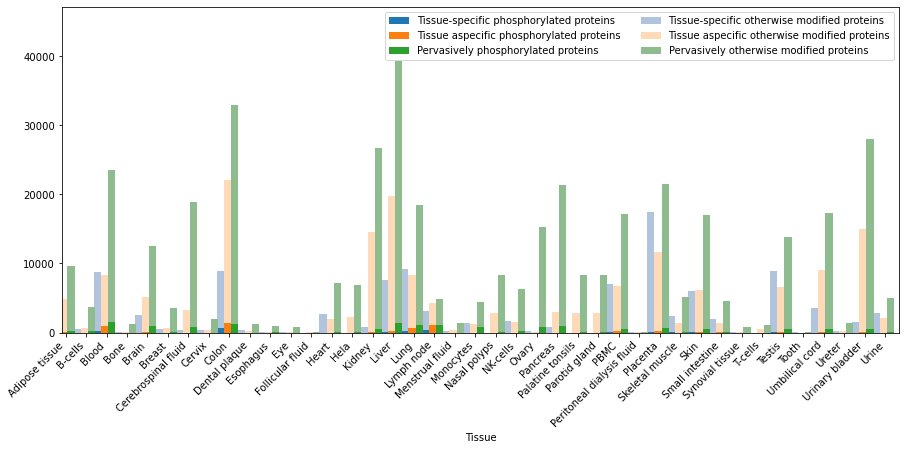

In [18]:
plt.figure(figsize=(15,6))
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)

count_proteins[["Tissue", "Tissue-specific phosphorylated proteins",
                "Tissue-specific otherwise modified proteins"
               ]].plot(kind="bar", stacked=True, x="Tissue", color={"Tissue-specific phosphorylated proteins": "tab:blue",
                                                                                         "Tissue-specific otherwise modified proteins": "lightsteelblue"
                                                                                         }, figsize=(15,6),
                                                                                  ax=ax, width=0.35, position=1.75)
count_proteins[["Tissue", "Tissue aspecific phosphorylated proteins",
                "Tissue aspecific otherwise modified proteins"
                 ]].plot(kind="bar", stacked=True, x="Tissue", color={"Tissue aspecific phosphorylated proteins": "tab:orange",
                                                                                         "Tissue aspecific otherwise modified proteins": "peachpuff"
                                                                                         },
                                                                                    figsize=(15,6),
                                                                                  ax=ax, width=0.35, position=0.75)

count_proteins[["Tissue", "Pervasively phosphorylated proteins",
                "Pervasively otherwise modified proteins"
                  ]].plot(kind="bar", stacked=True, x="Tissue", color={"Pervasively phosphorylated proteins": "tab:green",
                                                                                         "Pervasively otherwise modified proteins": "darkseagreen"
                                                                                         },
                                                                                    figsize=(15,6),
                                                                                  ax=ax, width=0.35, position=-0.25)
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,2,4,1,3,5]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], ncol=2)
plt.xticks(rotation=45, ha="right")
plt.margins(0.2)
#plt.legend(ncol=3)
#plt.savefig("Number of proteins in each of the three categories.png", format="png", bbox_inches="tight")
plt.show()

In [19]:
relative_count_proteins = pd.DataFrame({"Tissue": list_tissues_STY})
relative_count_proteins["percentage tissue-specific phosphorylated proteins"] = count_proteins["Tissue-specific phosphorylated proteins"]*100/(count_proteins["Tissue-specific phosphorylated proteins"]+count_proteins["Tissue-specific otherwise modified proteins"])
relative_count_proteins["percentage tissue aspecific phosphorylated proteins"] = count_proteins["Tissue aspecific phosphorylated proteins"]*100/(count_proteins["Tissue aspecific phosphorylated proteins"]+count_proteins["Tissue aspecific otherwise modified proteins"])
relative_count_proteins["percentage pervasively phosphorylated proteins"] = count_proteins["Pervasively phosphorylated proteins"]*100/(count_proteins["Pervasively phosphorylated proteins"]+count_proteins["Pervasively otherwise modified proteins"])
relative_count_proteins

,Tissue,percentage tissue-specific phosphorylated proteins,percentage tissue aspecific phosphorylated proteins,percentage pervasively phosphorylated proteins
0,Adipose tissue,NaN,0.803130,3.235539
1,B-cells,0.845666,4.141104,5.457984
2,Blood,2.749886,11.677950,6.525912
3,Bone,0.781250,0.892857,0.731707
4,Brain,0.762134,1.089494,7.561422
5,Breast,0.512821,1.642036,2.078652
6,Cerebrospinal fluid,0.291545,0.328162,4.612048
7,Cervix,1.179941,0.675676,0.559227
8,Colon,7.098731,6.293548,3.879179
9,Dental plaque,1.729107,0.970874,1.311475


Percentages are calculated as follows: $\frac{\text{the number of phosphoproteins in tissue X in category a*100}}{\text{the number of proteins bearing a modification (including phosphorylation) in tissue X in category a}} $

Some tissues show more association with phosphorylation than others. This could be (in part) related to the amount of projects investigating this tissue, or to enrichment strategies for phosphorylation.

For example, the highest percentage phosphorylated proteins in a cateogry, in a tissue has been identified in lymph node. This tissue is associated with 2 projects, both using phospho-enrichment (TiO2 and IMAC). Similarly, for lung, 8 out of 13 projects were enriched for phosphorylation. However, for blood, only 2 out of 28 projects are enriched for phosphopeptides, and for monocytes, no enriched projects were used. For colon, only one out of 6 projects was enriched for phosphopeptides. 

<AxesSubplot:title={'center':'Percentage phosphorylated proteins per category per tissue'}, xlabel='Tissue'>

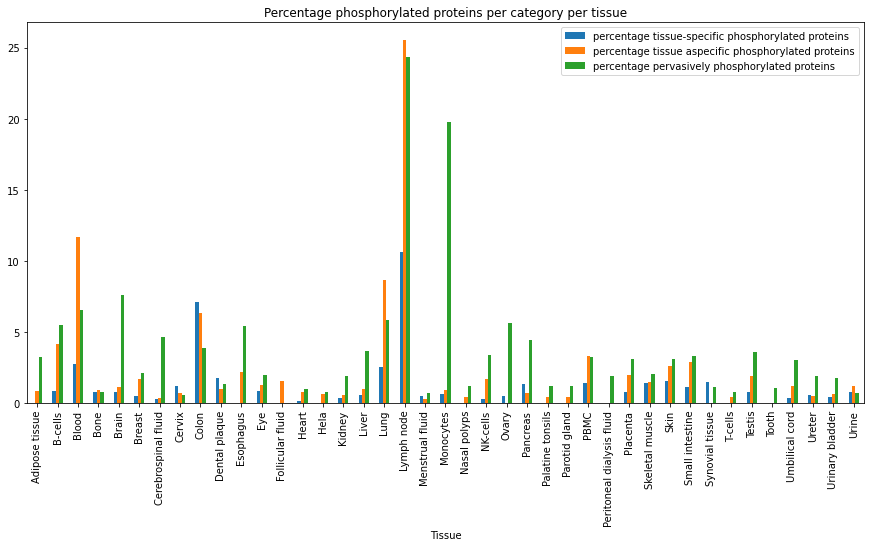

In [20]:
relative_count_proteins.plot(x="Tissue", kind="bar", figsize=(15,7), title="Percentage phosphorylated proteins per category per tissue")

In [44]:
cat_all_mod = pd.DataFrame({"Tissue": list_tissues_STY})
for mod in list_mods:
    list_tspec = []
    list_taspec = []
    list_gen = []
    for tissue in list_tissues_STY:
        if mod == "[21]Phospho":
            tspec_count = data_P_tspec_protein[tissue].sum()
            taspec_count = data_P_taspec_protein[tissue].sum()
            gen_count = data_P_gen_protein[tissue].sum()
        else:
            tspec_count = data_all_mod_tspec_protein[data_all_mod_tspec_protein["modification"]==mod][tissue].sum()
            taspec_count = data_all_mod_taspec_protein[data_all_mod_taspec_protein["modification"]==mod][tissue].sum()
            gen_count = data_all_mod_gen_protein[data_all_mod_gen_protein["modification"]==mod][tissue].sum()
        list_tspec.append(tspec_count)
        list_taspec.append(taspec_count)
        list_gen.append(gen_count)
    col_tspec = "tspec_"+mod
    col_taspec = "taspec_"+mod
    col_gen = "pervasively_"+mod
    sub = pd.DataFrame({})
    sub[col_tspec] = list_tspec
    sub[col_taspec] = list_taspec
    sub[col_gen] = list_gen
    cat_all_mod = pd.concat([cat_all_mod, sub], axis=1)
    print(mod)

[1]Acetyl
[4]Carbamidomethyl
[5]Carbamyl
[21]Phospho
[23]Dehydrated
[34]Methyl
[35]Oxidation
[40]Sulfo
[41]Hex
[43]HexNAc
[47]Palmitoyl
[49]Phosphopantetheine
[54]Glucuronyl
[58]Propionyl
[118]EDT-iodoacetyl-PEO-biotin
[122]Formyl
[129]Iodo
[130]Diiodo
[131]Triiodo
[142]HexNAc(1)dHex(1)
[143]HexNAc(2)
[144]Hex(3)
[178]DAET
[200]Ethanedithiol
[264]PET
[270]Cytopiloyne
[271]Cytopiloyne+water
[275]Nitrosyl
[276]AEBS
[292]IodoU-AMP
[295]dHex
[327]Delta:H(4)C(2)O(-1)S(1)
[333]Can-FP-biotin
[337]Methylamine
[340]Bromo
[342]Amino
[345]Trioxidation
[354]Nitro
[361]Thrbiotinhydrazide
[362]Diisopropylphosphate
[363]Isopropylphospho
[385]Ammonia-loss
[392]Quinone
[397]Triiodothyronine
[400]Tyr->Dha
[401]Didehydro
[403]Ser->LacticAcid
[405]Phosphoadenosine
[417]PhosphoUridine
[419]Glycerophospho
[425]Dioxidation
[426]Octanoyl
[428]PhosphoHexNAc
[429]PhosphoHex
[431]Palmitoleyl
[442]FMN
[447]Deoxy
[449]Decanoyl
[454]HexN
[472]AEC-MAEC
[478]FTC
[490]Hep
[512]Hex(2)
[534]Dibromo
[684]BDMAPP
[723]O-Di

In [45]:
cat_all_mod

,Tissue,tspec_[1]Acetyl,taspec_[1]Acetyl,pervasively_[1]Acetyl,tspec_[4]Carbamidomethyl,taspec_[4]Carbamidomethyl,pervasively_[4]Carbamidomethyl,tspec_[5]Carbamyl,taspec_[5]Carbamyl,pervasively_[5]Carbamyl,...,pervasively_[2006]Haloxon,tspec_[2007]Methamidophos-S,taspec_[2007]Methamidophos-S,pervasively_[2007]Methamidophos-S,tspec_[2008]Methamidophos-O,taspec_[2008]Methamidophos-O,pervasively_[2008]Methamidophos-O,tspec_[2014]Nitrene,taspec_[2014]Nitrene,pervasively_[2014]Nitrene
0,Adipose tissue,0,85,369,0,51,1035,0,60,297,...,0,0,27,19,0,48,34,0,13,67
1,B-cells,8,17,64,18,83,904,4,3,56,...,1,3,3,1,2,0,1,2,0,10
2,Blood,122,146,568,132,294,2445,94,118,576,...,25,50,52,51,106,42,106,27,48,98
3,Bone,2,6,79,4,1,151,0,1,43,...,0,1,0,1,4,0,2,1,1,5
4,Brain,80,238,528,50,260,1629,44,172,477,...,2,18,13,25,15,24,34,11,14,63
5,Breast,3,11,80,2,11,341,2,10,78,...,0,6,10,18,8,4,19,5,0,33
6,Cerebrospinal fluid,5,136,570,13,223,1892,5,129,636,...,25,2,12,53,0,14,88,1,13,88
7,Cervix,4,6,43,4,18,159,4,4,55,...,1,5,0,3,2,2,2,4,4,25
8,Colon,159,505,1350,112,641,3619,116,504,1410,...,12,66,111,68,58,100,82,33,154,188
9,Dental plaque,17,15,29,3,12,98,4,4,25,...,0,0,0,0,1,3,1,3,1,3


<AxesSubplot:title={'center':'Percentage phosphorylated proteins per category per tissue'}, xlabel='Tissue'>

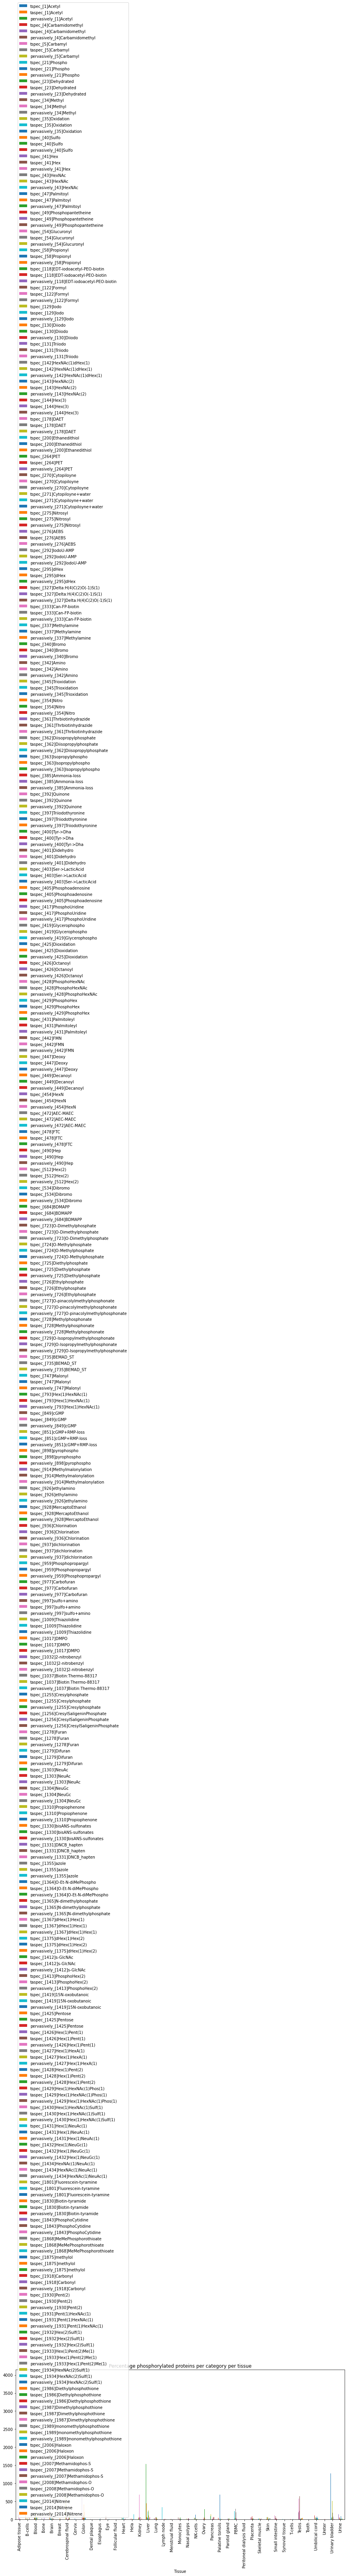

In [47]:
cat_all_mod.plot(x="Tissue", kind="bar", figsize=(15,7), title="Percentage phosphorylated proteins per category per tissue")